<a href="https://colab.research.google.com/github/Aanisha/ML-experiments/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"

--2021-04-09 14:05:52--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.09s   

2021-04-09 14:05:53 (4.97 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
img = cv2.imread("/content/Lenna_(test_image).png")

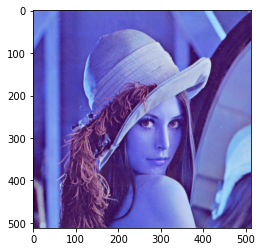

In [4]:
plt.imshow(img)

In [7]:
img_gr = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

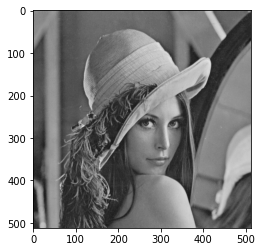

In [9]:
plt.imshow(img_gr, cmap="gray", vmin=0, vmax=255)

Image Histogram

In [11]:
img_gr

array([[144, 144, 146, ..., 150, 134, 108],
       [144, 144, 146, ..., 150, 134, 108],
       [144, 144, 146, ..., 150, 134, 108],
       ...,
       [ 38,  38,  44, ...,  88,  82,  80],
       [ 39,  39,  48, ...,  85,  87,  89],
       [ 39,  39,  48, ...,  85,  87,  89]], dtype=uint8)

In [13]:
img_gr.shape

(512, 512)

In [16]:
image_matrix = img_gr.flatten()

In [17]:
image_matrix

array([144, 144, 146, ...,  85,  87,  89], dtype=uint8)

In [22]:
pixels = np.arange(0,256)

In [23]:
pixels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [48]:
occurences = []
for i in range(0,256):
  
  occurences.append(np.count_nonzero(image_matrix == i))

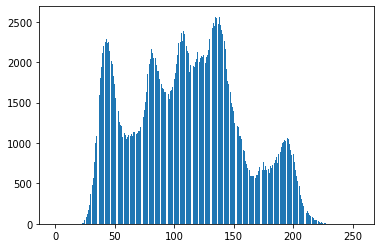

In [49]:
plt.bar(pixels,occurences)
plt.show()

In [50]:
process = []
for i in range(len(image_matrix)):
  if(image_matrix[i]>128):
    process.append(255)
  else:
    process.append(0)


In [52]:
process = np.array(process)
process = np.reshape(process,(512,512))

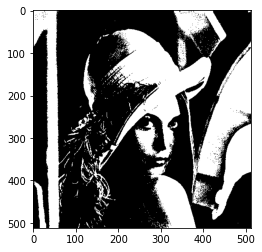

In [53]:
plt.imshow(process, cmap="gray", vmin=0, vmax=255)

In [54]:
new_process = np.add(process,-255)

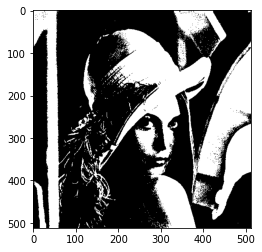

In [59]:
plt.imshow(new_process, cmap='gray')

In [56]:
new_process

array([[   0,    0,    0, ...,    0,    0, -255],
       [   0,    0,    0, ...,    0,    0, -255],
       [   0,    0,    0, ...,    0,    0, -255],
       ...,
       [-255, -255, -255, ..., -255, -255, -255],
       [-255, -255, -255, ..., -255, -255, -255],
       [-255, -255, -255, ..., -255, -255, -255]])

Contrast

Thresholding to a level such that all pixel values below the L value will be 0, and above H will be 255.

Here, for simplicity, a window of 100 pixels is selected.

In [60]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [66]:
def f(x):

   process = []
   for i in range(len(image_matrix)):
    if(image_matrix[i]>=x+100):
      process.append(255)
    elif(image_matrix[i]<=x):
      process.append(0)
    else:
      process.append(image_matrix[i])
   process = np.array(process)
   process = np.reshape(process,(512,512))
   plt.imshow(process, cmap='gray')
   print("Value of H "+str(x+100))
   print("Value of L "+str(x))
    
interact(f, x=widgets.IntSlider(min=0, max=150, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=150), Output()), _dom_classes=('widget-interact…

Histogram Equalization(?)

In [68]:
t_sum = np.sum(np.array(occurences))

In [94]:
def f(x):

   p = []
   for i in range(len(image_matrix)):
     a = (sum(occurences[:x])/t_sum)*image_matrix[i]
     p.append(a)
     #print(a)
   p = np.array(p)
   p = np.reshape(p,(512,512))
   plt.imshow(p, cmap='gray')
   plt.show()
   print("Value of H "+str(x))
   occurr = []
   for i in range(0,256):
    occurr.append(np.count_nonzero(p == i))
   plt.bar(pixels,occurences)
   plt.show()
   #print("Value of L "+str(x))
    
interact(f, x=widgets.IntSlider(min=0, max=255, step=1, value=100));

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

0.4105491638183594

In [85]:
len(occurences)

256